# Tarea #5 Segmentación

##Integrantes

* Gabriela María Castro Beltrán
* Juan Nicolas Carvajal Useche


Primero, se importan las librerías e imágenes requeridas para el desarrollo del taller.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
# Test scipy version, since active contour is only possible
# with recent scipy version
import scipy
from scipy import signal
from scipy import misc
from skimage.segmentation import slic, mark_boundaries
import slic as slic_wrap # code available at https://github.com/amueller/slic-python

In [ ]:
!pip install slic

Se cargan las imagen que se utilizaran en la implementación de segmentación, junto con las imagenes segmentadas por un humano.

In [ ]:
img_personas = cv2.imread("mua.jpeg", cv2.IMREAD_COLOR)
img_personas = cv2.cvtColor(img_personas, cv2.COLOR_BGR2GRAY)
#Segmentada a mano
img_peryo = cv2.imread("carasyo.jpg", cv2.IMREAD_COLOR)
img_peryo = cv2.cvtColor(img_peryo, cv2.COLOR_BGR2GRAY)


img_semaforo = cv2.imread("semaforo2.jpg", cv2.IMREAD_COLOR)
img_semaforo = cv2.cvtColor(img_semaforo, cv2.COLOR_BGR2GRAY)
#Segmentada a mano
img_semaforoyo = cv2.imread("semaforo2yo.jpg", cv2.IMREAD_COLOR)
img_semaforoyo = cv2.cvtColor(img_semaforoyo, cv2.COLOR_BGR2GRAY)


#Esta umbralización se realiza para detectar la señal de pase en el semaforo
h,img_t = cv2.threshold(img_semaforo, 100, 255, cv2.THRESH_BINARY_INV)


img_senal = cv2.imread("peatonal.jpg", cv2.IMREAD_COLOR)
img_senal2 = cv2.cvtColor(img_senal, cv2.COLOR_BGR2GRAY)
#Segmentada a mano
img_senalyo = cv2.imread("peatonalyo.jpg", cv2.IMREAD_COLOR)
img_senal2yo = cv2.cvtColor(img_senalyo, cv2.COLOR_BGR2GRAY)



## Segmentación basada en bordes

### Snake o contornos activos

 Es una técnica en procesamiento de imágenes y visión por computadora que se utiliza para detectar y delinear contornos en una imagen. Los contornos activos son curvas o líneas deformables que se ajustan a la forma de un objeto en una imagen al minimizar una energía determinada. Estas curvas se mueven y cambian de forma para rodear y seguir los límites de los objetos en una imagen.

 El proceso de segmentación de contornos activos implica definir una función de energía que consiste en dos componentes principales: una que alienta a la serpiente a ajustarse a los bordes del objeto que se desea segmentar y otra que desalienta la serpiente a cambiar su forma en exceso. Luego, se utiliza un algoritmo de optimización, como el método de gradiente descendente, para ajustar la serpiente a los bordes del objeto en la imagen.

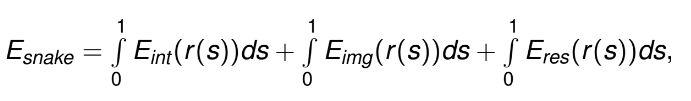
donde
*  Eint representa la energía interna del snake,
* Eimg las fuerzas de la imagen y
* Eres las fuerzas restrictivas externas.

Los pasos para usar la segmentación Snake son los siguientes:


 * **Inicialización:** En primer lugar, se debe proporcionar una ubicación y una forma inicial para la serpiente. Esto generalmente se hace mediante un contorno o una curva cerrada que se coloca cerca del contorno del objeto de interés en la imagen.

 * **Definición de la energía:** Se define una función de energía que consta de dos componentes principales: la energía interna y la energía externa.

     * **Energía interna:** Esta componente desalienta cambios excesivos en la forma de la serpiente. Puede incluir términos que promuevan la suavidad de la curva, como la energía de flexión, y términos que controlen la longitud de la serpiente.

     * **Energía externa:** Esta componente alienta a la serpiente a moverse hacia los bordes del objeto. Se calcula a partir de las características de la imagen que son relevantes para la detección de bordes, como gradientes de intensidad


* **Optimización:** Se utiliza un algoritmo de optimización, comúnmente el método de gradiente descendente, para minimizar la función de energía total.

En donde tomando:

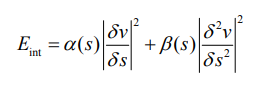

Se observa que la energía interna (Eint) refleja cómo el contorno elástico puede deformarse, y las funciones α(s) y β(s) son responsables de determinar en qué medida la serpiente puede estirarse o curvarse.En donde un aumento en el valor de α(s) provoca un incremento en la tensión de la curva, lo que tiende a suavizar la serpiente y reducir su longitud al eliminar bucles o rizos. Por otro lado, el aumento de β(s) aumenta la rigidez de la serpiente, lo que la hace adoptar una forma más suave y menos flexible y el término γ es el que se encarga de aproximar la curva a los mínimos locales, si se elige un valor demasiado alto, la curva puede no ajustarse a los límites del
objeto deseado.


In [ ]:
def circulo(resolucion,centro,radio):
  radians=np.linspace(0,2*np.pi,resolucion)
  c=centro[1]+radio*np.cos(radians)
  r=centro[0]+radio*np.sin(radians)
  return np.array([c,r]).T

def curva(resolucion,centro,a,b):
  radians=np.linspace(0,2*np.pi,resolucion)
  c=centro[1]+a*np.cos(radians)
  r=centro[0]+b*np.sin(radians)
  return np.array([c,r]).T

#Curvas_personas
points_cara=circulo(200,[800,600],180)
points_cara2=circulo(200,[1080,270],210)

#Curvas semaforo
points_s=curva(400,[1400,900],500,700)
points_s2=circulo(200,[1550,600],80)

#Curvas_señal
points_sp=curva(200,[360,45],45,60)

#Snake_personas
snake_c = active_contour(gaussian(img_personas, 3, preserve_range=False),
                       points_cara, alpha=0.009, beta=0.1)#0.009 y 0.08
snake_c2 = active_contour(gaussian(img_personas, 3, preserve_range=False),
                       points_cara2, alpha=0.009, beta=0.1)#0.009 y 0.08


#Snakes_ semaforo
snake4 = active_contour(gaussian(img_semaforo,3, preserve_range=False),
                       points_s, alpha=0.008, beta=0.1,gamma=0.001)#0.009 y 0
snake5 = active_contour(gaussian(img_t,3, preserve_range=False),
                       points_s2, alpha=0.009, beta=0.1,gamma=0.001)#0.009 y 0.08

#Snake_señal
snake6 = active_contour(gaussian(img_senal,3),
                       points_sp, alpha=0.005, beta=12,gamma=0.001)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


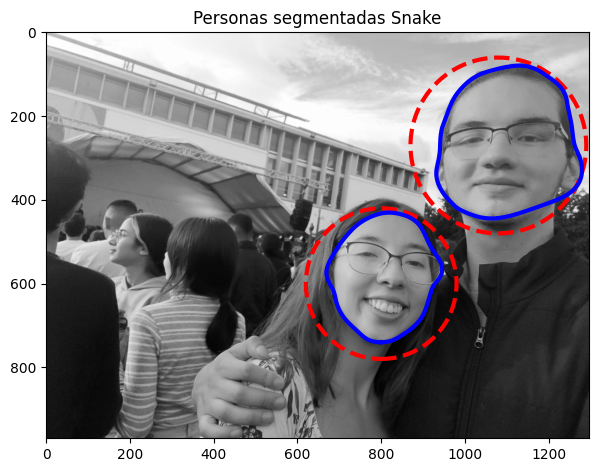

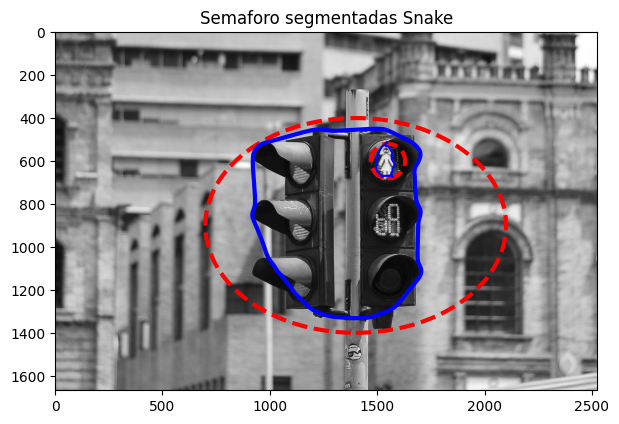

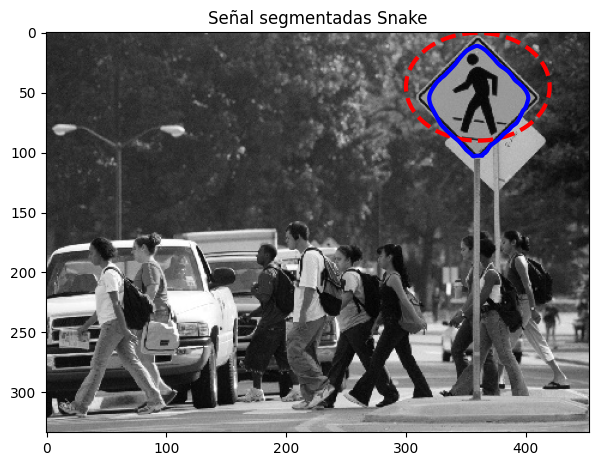

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_personas, cmap=plt.cm.gray)
ax.plot(points_cara[:, 1], points_cara[:, 0], '--r', lw=3)
ax.plot(snake_c[:,1], snake_c[:, 0], '-b', lw=3)
ax.plot(points_cara2[:, 1], points_cara2[:, 0], '--r', lw=3)
ax.plot(snake_c2[:, 1], snake_c2[:, 0], '-b', lw=3)
plt.title("Personas segmentadas Snake")
plt.show();

fig1, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_semaforo, cmap=plt.cm.gray)
ax.plot(points_s[:, 1], points_s[:, 0], '--r', lw=3)
ax.plot(snake4[:, 1], snake4[:, 0], '-b', lw=3)
ax.plot(points_s2[:, 1], points_s2[:, 0], '--r', lw=3)
ax.plot(snake5[:, 1], snake5[:, 0], '-b', lw=1.5)
plt.title("Semaforo segmentadas Snake")
plt.show();

fig2, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_senal2, cmap=plt.cm.gray)
ax.plot(points_sp[:, 1], points_sp[:, 0], '--r', lw=3)
ax.plot(snake6[:, 1], snake6[:, 0], '-b', lw=3)
plt.title("Señal segmentadas Snake")
plt.show();

## SLIC (Simple Linear Iterative Clustering)

Es un algoritmo de segmentación de superpíxeles utilizado en procesamiento de imágenes y visión por computadora. Es una técnica que se utiliza para dividir una imagen en regiones superpíxel, lo que significa que agrupa píxeles similares en segmentos más grandes. SLIC se basa en una versión simplificada del algoritmo de k-means y ha demostrado ser efectivo en la segmentación de imágenes.

Aquí hay una breve descripción de cómo funciona SLIC:

* Inicialización de centros: El algoritmo comienza con una inicialización de centros en la imagen. Estos centros representan el lugar donde se comenzará a formar cada superpíxel.

* Asignación de píxeles: Luego, cada píxel de la imagen se asigna al centro más cercano en función de la similitud en color y posición. Esto crea segmentos iniciales que se extienden desde los centros.

* Actualización de centros: Los centros se actualizan para reflejar la media de los píxeles asignados a cada superpíxel. Esto ajusta la ubicación de los superpíxeles.

* Repetición: Los pasos 2 y 3 se repiten iterativamente hasta que se alcanza un criterio de convergencia, como una cantidad mínima de cambio en los centros.

La función slic en la biblioteca scikit-image es una herramienta fundamental para la segmentación de superpíxeles en imágenes. Esta técnica divide una imagen en regiones superpíxel, donde cada superpíxel es un grupo de píxeles con características similares en términos de color y textura. Los parámetros clave de esta función permiten ajustar el nivel de segmentación, la regularidad de los superpíxeles y su conectividad. Al definir el número de superpíxeles deseados, el grado de compactación, la suavización y otros ajustes, puedes adaptar la segmentación a las necesidades específicas de tu aplicación. Si se elige un número grande de superpíxeles, obtendrás una segmentación más detallada, mientras que un número menor generará superpíxeles más grandes y menos segmentación. La función slic devuelve etiquetas que indican a qué superpíxel pertenece cada píxel en la imagen original, lo que facilita análisis y visualización posteriores.

In [ ]:
#Carga imagen
img = cv2.imread('mua.jpeg',1)
img = cv2.cvtColor(cv2.imread('mua.jpeg',1), cv2.COLOR_BGR2RGB)

#Carga imagen
img2 = cv2.imread("semaforo2.jpg", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#Carga imagen
img3 = cv2.imread("peatonal.jpg", cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#SLIC
#skimage version\n enforce_connectivity=False', size=9
slic1 = slic(img, 100, 10, sigma=1, enforce_connectivity=False)

#skimage version\n  enforce_connectivity=True', size=9
slic2 = slic(img, 50, 10, sigma=1, enforce_connectivity=True)

#skimage version\n enforce_connectivity=False', size=9
slic3 = slic(img2, 100, 10, sigma=1, enforce_connectivity=False)

#skimage version\n  enforce_connectivity=True', size=9
slic4 = slic(img2, 50, 10, sigma=1, enforce_connectivity=True)

#skimage version\n enforce_connectivity=False', size=9
slic5 = slic(img3, 100, 10, sigma=1, enforce_connectivity=False)

#skimage version\n  enforce_connectivity=True', size=9
slic6 = slic(img3, 50, 10, sigma=1, enforce_connectivity=True)


<ipython-input-29-eaa449f006eb>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(321),plt.imshow(mark_boundaries(img, slic1),cmap = 'gray')


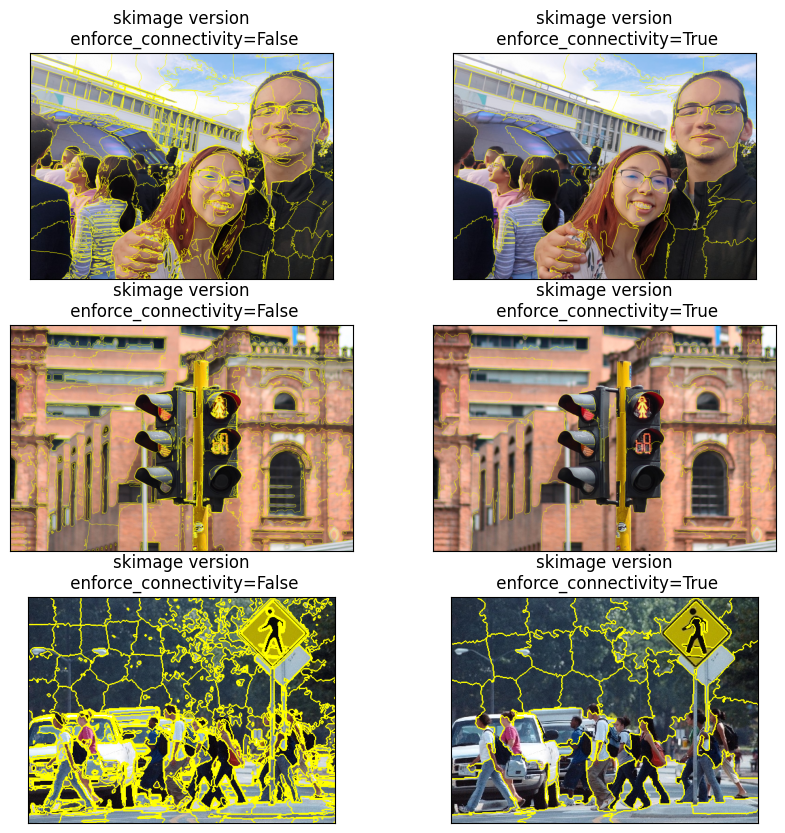

In [ ]:
#Visualizacion
plt.figure(1,figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.subplot(321),plt.imshow(mark_boundaries(img, slic1),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=False'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(mark_boundaries(img, slic2),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=True'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mark_boundaries(img2, slic3),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=False'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(mark_boundaries(img2, slic4),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=True'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(mark_boundaries(img3, slic5),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=False'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(mark_boundaries(img3, slic6),cmap = 'gray')
plt.title('skimage version\n enforce_connectivity=True'), plt.xticks([]), plt.yticks([])


plt.show()

## Mascaras

En esta sección, se generan máscaras para las dos técnicas implementadas en las tres imágenes con el fin de prepararlas para su posterior evaluación de segmentación. Sin embargo, es importante destacar una diferencia en la complejidad entre ambas técnicas.

Para la técnica de "Snake", la creación de la máscara es relativamente sencilla, ya que se basa en la definición de un polinomio alrededor de la segmentación existente. Luego, solo es necesario rellenar esta área para obtener la máscara correspondiente.

En contraste, para la segunda técnica, se requiere un proceso de posprocesamiento más elaborado. En esta etapa, se identifican los superpíxeles que componen la región a segmentar, se procede a su relleno y se genera la máscara final. Este proceso adicional se debe a la naturaleza de la técnica y la necesidad de trabajar con superpíxeles, lo que implica un paso extra en comparación con el enfoque de "Snake".

Text(0.5, 1.0, 'Mascara superpixeles señal')

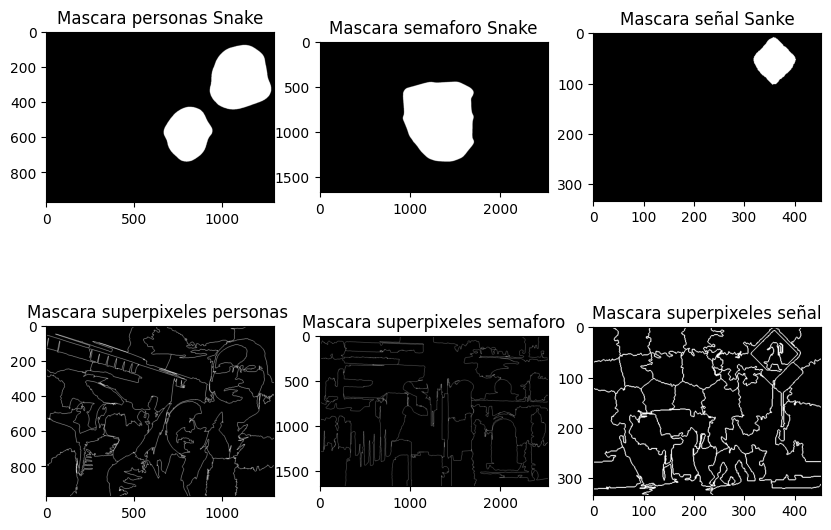

In [ ]:
#Mascaras
mask = np.zeros_like(img_personas, dtype=np.uint8)
mask2 = np.zeros_like(img_personas, dtype=np.uint8)
mask_sema = np.zeros_like(img_semaforo, dtype=np.uint8)
mask_sema2 = np.zeros_like(img_semaforo, dtype=np.uint8)
mask_senal = np.zeros_like(img_senal2, dtype=np.uint8)
mask_senal2 = np.zeros_like(img_senal2, dtype=np.uint8)
# Invertir las coordenadas para que coincidan con OpenCV
snake_x = snake_c[:, 1]
snake_y = snake_c[:, 0]

snake2_x = snake_c2[:, 1]
snake2_y = snake_c2[:, 0]

snake4_x = snake4[:, 1]
snake4_y = snake4[:, 0]

snake5_x = snake5[:, 1]
snake5_y = snake5[:, 0]

snake6_x = snake6[:, 1]
snake6_y = snake6[:, 0]

# Dibujar los contornos de la segmentación en la máscara
snake_c_ = np.column_stack((snake_x, snake_y))
snake_c2_ = np.column_stack((snake2_x, snake2_y))
snake_s_ = np.column_stack((snake4_x, snake4_y))
snake_s2_ = np.column_stack((snake5_x, snake5_y))
snake_p_ = np.column_stack((snake6_x, snake6_y))

#Mascara imagen caras
#snake
mask_cara=cv2.drawContours(mask, [snake_c_.astype(int)], 0, (255), -1)
mask_cara=cv2.drawContours(mask, [snake_c2_.astype(int)], 0, (255), -1)

#Mascara imagen semaforo
#Snake
mask_semaforo=cv2.drawContours(mask_sema, [snake_s_.astype(int)], 0, (255), -1)
mask_semaforo=cv2.drawContours(mask_sema, [snake_s2_.astype(int)], 0, (255),-1)

#Mascara imagen señal
mask_peatonal=cv2.drawContours(mask_senal, [snake_p_.astype(int)], 0, (255), -1)

#Mascara SLIC
# Genera una imagen con los contornos de la segmentación
boundaries_c = mark_boundaries(mask2, slic2, color=(1, 0, 0))
# Convierte la imagen de contornos en una máscara binaria
mask_cara_slic = (boundaries_c[:, :, 0] == 1).astype(np.uint8)

# Genera una imagen con los contornos de la segmentación
boundaries_s = mark_boundaries(mask_sema2, slic4, color=(1, 0, 0))
# Convierte la imagen de contornos en una máscara binaria
mask_sema_slic = (boundaries_s[:, :, 0] == 1).astype(np.uint8)

# Genera una imagen con los contornos de la segmentación
boundaries_p = mark_boundaries(mask_senal2, slic6, color=(1, 0, 0))
# Convierte la imagen de contornos en una máscara binaria
mask_senal_slic = (boundaries_p[:, :, 0] == 1).astype(np.uint8)

plt.figure(figsize=[10, 7])
plt.subplot(231);plt.imshow(mask_cara,cmap='gray'); plt.title("Mascara personas Snake")
plt.subplot(232);plt.imshow(mask_semaforo,cmap='gray'); plt.title("Mascara semaforo Snake")
plt.subplot(233);plt.imshow(mask_peatonal,cmap='gray'); plt.title("Mascara señal Sanke")
plt.subplot(234);plt.imshow(mask_cara_slic,cmap='gray'); plt.title("Mascara superpixeles personas ")
plt.subplot(235);plt.imshow(mask_sema_slic,cmap='gray'); plt.title("Mascara superpixeles semaforo")
plt.subplot(236);plt.imshow(mask_senal_slic,cmap='gray'); plt.title("Mascara superpixeles señal")


Etiquetas de superpíxeles: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Text(0.5, 1.0, 'Mascara señal SLIC')

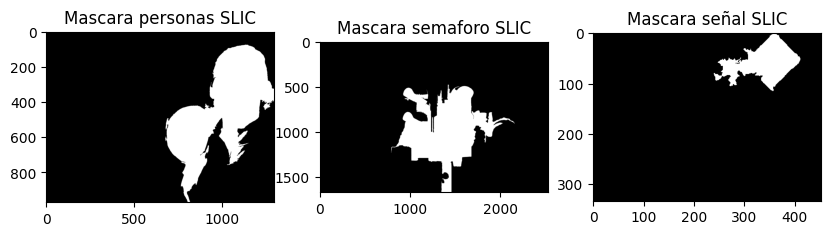

In [ ]:
# Obtiene las etiquetas únicas de los superpíxeles
unique_labels = np.unique(slic2)#Personas
unique_labels2 = np.unique(slic4)#Semaforo
unique_labels3 = np.unique(slic6)#Señal

# Imprime las etiquetas de los superpíxeles
print("Etiquetas de superpíxeles:", unique_labels3)

# Selecciona los superpíxeles que deseas llenar (por ejemplo, superpíxeles con etiqueta 2 y 3)
superpixels_to_fill = [8,9,15,14,23,30,21]
superpixels_to_fill2 = [13,18,20,15,23]
superpixels_to_fill3 = [7,8]

# Crea una máscara con valor 255 solo en los píxeles de los superpíxeles seleccionados
mask_caras_slic = np.zeros_like(slic2, dtype=np.uint8)
mask_semas_slic = np.zeros_like(slic4, dtype=np.uint8)
mask_senals_slic = np.zeros_like(slic6, dtype=np.uint8)


for label in superpixels_to_fill:
    mask_caras_slic[slic2 == label] = 255

for label in superpixels_to_fill2:
    mask_semas_slic[slic4 == label] = 255

for label in superpixels_to_fill3:
    mask_senals_slic[slic6 == label] = 255



plt.figure(figsize=[10, 7])
plt.subplot(131);plt.imshow(mask_caras_slic,cmap='gray'); plt.title("Mascara personas SLIC")
plt.subplot(132);plt.imshow(mask_semas_slic,cmap='gray'); plt.title("Mascara semaforo SLIC")
plt.subplot(133);plt.imshow(mask_senals_slic,cmap='gray'); plt.title("Mascara señal SLIC")

## Mascara con segmentación humana

En esta sección se muestra la segmentación que se realizó a mano de las imagenes proporcionadas para las siguientes evaluaciones.

Text(0.5, 1.0, 'Señal segementada por humano')

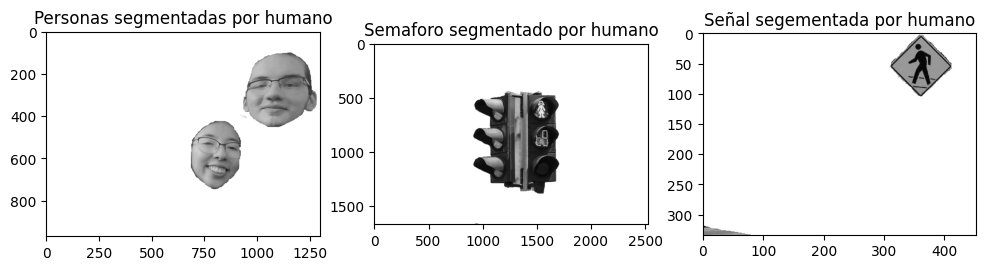

In [ ]:
plt.figure(figsize=[12, 12])
plt.subplot(231);plt.imshow(img_peryo,cmap='gray'); plt.title("Personas segmentadas por humano")
plt.subplot(232);plt.imshow(img_semaforoyo,cmap='gray'); plt.title("Semaforo segmentado por humano")
plt.subplot(233);plt.imshow(img_senal2yo,cmap='gray'); plt.title("Señal segementada por humano")

## Evaluación de la segmentación

### Ajuste de frontera (Boundary matching)

El ajuste de frontera es un proceso que implica la comparación de las fronteras generadas automáticamente por un algoritmo con las fronteras del etiquetado humano, y se evalúa mediante métricas como la precisión y la sensitividad. Estas métricas permiten medir cuán cerca está el algoritmo de coincidir con las fronteras humanas y ayudan a evaluar su desempeño en términos de sobre-segmentación y sub-segmentación. El método es sensible a la granularidad del etiquetado humano, lo que significa que su eficacia puede depender de cuán detallado o específico sea el etiquetado humano en la tarea de ajuste de frontera.

El código realizado para esta evaluación calcula la similitud entre los contornos de dos máscaras, una llamada "segmentación" y otra "referencia". La función utiliza cv2.matchShapes para comparar los contornos y almacena las métricas de similitud en una lista llamada intersections. La función devuelve esta lista de métricas de coincidencia de bordes entre todas las combinaciones posibles de contornos de referencia y segmentación. Para obtener una métrica resumida de la coincidencia de bordes, se podría calcular el promedio.

In [ ]:
import cv2
import numpy as np

def boundary_matching(segmentacion, referencia):
    # Calculamos los contornos de las máscaras de segmentación y referencia
    contours_seg, _ = cv2.findContours(segmentacion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_ref, _ = cv2.findContours(referencia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inicializamos la métrica de Ajuste de frontera
    matching_metric = 0.0
    intersections=[]
    for cont_ref in contours_ref:
        for cont_seg in contours_seg:
            # Calculamos la intersección entre los contornos
            intersection = cv2.matchShapes(cont_ref, cont_seg, cv2.CONTOURS_MATCH_I2, 0.0)
            intersections.append(intersection)
            matching_metric =intersections

    return matching_metric

In [ ]:
# Calculamos la métrica de Ajuste de frontera
matching_metric_c = boundary_matching(mask_cara,img_peryo)
matching_metric_s = boundary_matching(mask_semaforo,img_semaforoyo)
matching_metric_p = boundary_matching(mask_peatonal,img_senal2yo)

matching_metric_c2 = boundary_matching(mask_caras_slic,img_peryo)
matching_metric_s2 = boundary_matching(mask_semas_slic,img_semaforoyo)
matching_metric_p2 = boundary_matching(mask_senals_slic,img_senal2yo)

# Imprimimos el resultado
print("Boundary Matching Score Snake personas:", matching_metric_c)
print("Boundary Matching Score Snake semaforo:", matching_metric_s)
print("Boundary Matching Score Sanke señal:", matching_metric_p)

print("Boundary Matching Score SLIC personas:", matching_metric_c2)
print("Boundary Matching Score SLIC semaforo:", matching_metric_s2)
print("Boundary Matching Score SLIC señal:", matching_metric_p2)

Boundary Matching Score Snake personas: [0.4868305069495983, 1.0433156001483521]
Boundary Matching Score Snake semaforo: [0.8754261002464492]
Boundary Matching Score Sanke señal: [1.1660196948165762]
Boundary Matching Score SLIC personas: [1.2875231491128116]
Boundary Matching Score SLIC semaforo: [1.1368865980482141]
Boundary Matching Score SLIC señal: [1.0115075570749619]


## Intersección-sobre-Unión (IOU)

La Intersección-sobre-Unión (IOU, por sus siglas en inglés) es una métrica comúnmente utilizada en el campo de procesamiento de imágenes y visión por computadora para evaluar la precisión de la segmentación o detección de objetos. La IOU se utiliza para medir cuánto se superponen las regiones detectadas (o segmentadas) con respecto a las regiones de referencia en una imagen.

La fórmula para calcular la IOU se expresa de la siguiente manera:

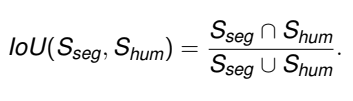

Donde:

* Sseg es la segmentación de la máquina
* Shum es la segmentacióm del etiquetado humano

In [ ]:
def iou (seg_h,seg_m):
  resul=cv2.bitwise_and(seg_h,seg_m)/cv2.bitwise_or(seg_h,seg_m)
  return resul

Text(0.5, 1.0, 'Señal segmentadas SLIC')

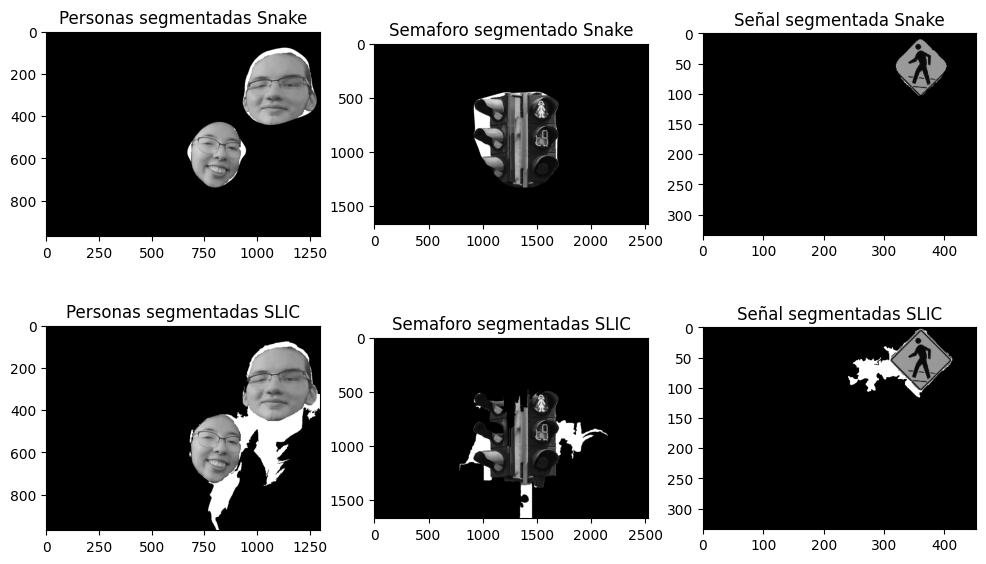

In [ ]:
iou_cara=iou(img_peryo,mask_cara)
iou_semaforo=iou(img_semaforoyo,mask_semaforo)
iou_peatonal=iou(img_senal2yo,mask_senal)

iou_cara_s=iou(img_peryo,mask_caras_slic)
iou_semaforo_s=iou(img_semaforoyo,mask_semas_slic)
iou_peatonal_s=iou(img_senal2yo,mask_senals_slic)

plt.figure(figsize=[12, 7])
plt.subplot(231);plt.imshow(iou_cara,cmap='gray'); plt.title("Personas segmentadas Snake")
plt.subplot(232);plt.imshow(iou_semaforo,cmap='gray'); plt.title("Semaforo segmentado Snake")
plt.subplot(233);plt.imshow(iou_peatonal,cmap='gray'); plt.title("Señal segmentada Snake")
plt.subplot(234);plt.imshow(iou_cara_s,cmap='gray'); plt.title("Personas segmentadas SLIC")
plt.subplot(235);plt.imshow(iou_semaforo_s,cmap='gray'); plt.title("Semaforo segmentadas SLIC")
plt.subplot(236);plt.imshow(iou_peatonal_s,cmap='gray'); plt.title("Señal segmentadas SLIC")

## Análisis

### Snake

La técnica de Snake se destaca por su capacidad para encontrar contornos precisos y detallados de objetos en imágenes. Esto es crucial en aplicaciones que involucran la segmentación de objetos, el seguimiento de objetos en movimiento y la extracción de características. Como se pudo observar en la imagenes con relieves o diferentes cambios de forma como lo son las personas tiene una gran adaptividad, logrando así una segmentación de calidad. Sin embargo esta técnica implica un proceso iterativo donde los "snakes" se ajustan hacia el contorno del objeto. Inician desde una posición inicial y se desplazan hacia los bordes del objeto bajo la influencia de la energía interna y externa. Este proceso se repite hasta que los "snakes" convergen hacia el contorno deseado.

De esta forma puede adaptarse eficazmente a objetos con contornos complejos y variados, ofrece contornos suaves y bien definidos, lo que mejora la calidad de la detección y es especialmente útil en situaciones donde otros métodos de detección de bordes pueden no ser efectivos. No obstante, la técnica puede ser computacionalmente costosa, especialmente en imágenes de alta resolución o con "snakes" que tienen muchos puntos.

Entre sus aplicaciones más populares se encuentran la segmentación de órganos en imágenes médicas, el seguimiento de objetos en secuencias de video, la detección de contornos en imágenes satelitales y la corrección de distorsiones en imágenes.

Ahora se nalizaran los resultados dados para las evaluaciones de segmentación:

**Ajuste de frontera**

Para empezar, en el proceso de evaluación de la técnica de "Snake" en cuanto al ajuste de frontera, observamos que valores de métricas por debajo de uno indican, en términos generales, que los contornos generados por esta técnica para las personas están próximos a los contornos de referencia, aunque aún se evidencia un cierto grado de discrepancia. Esto podría sugerir una falta de ajuste en algunos casos específicos, como lo observamos en el caso de la persona 1 y el semáforo.

Es importante destacar que en la imagen del semáforo, dado que se realiza una segunda segmentación para la señal de pase dentro de la segmentación del propio semáforo, la máscara resultante se limita al conjunto más grande de segmentación, dejando a la segunda máscara de la señal de pase sin consideración. Como resultado, esta segunda máscara queda incorporada en la máscara principal del semáforo, lo que conlleva a su pérdida y no se distingue por separado.

Por último para valores mayores a uno podría indicar una sobre-segmentación o un ajuste excesivo en el caso de las señales y la persona 2. Esto significa que los contornos generados por "Snake" para las señales pueden ser más complejos o extensos que los contornos de referencia.

**IOU**

Para esta métrica de evaluación como se puede observar se tiene que la técnica de Snake tiene una gran similitud con la imagen segmentada por un humano en donde al comparar los valores de IOU con la imagen de referencia, los resultados pueden utilizarse para identificar áreas específicas de la segmentación que requieren mejoras o ajustes. Se pueden realizar ajustes en la técnica de "Snake" para mejorar la precisión en las áreas donde el IOU es bajo.


### SLIC

Se observa que la técnica de SLIC a comparación de la implementada con Snake tiene una peor calidad de segmentación, esto se ve a simple vista y se debe a que esta segmentación se realiza basándose en tamaños fijos y número de superpíxeles, lo que hace que la calidad de segmentación dependa directamente del tamaño del objeto a segmentar. Se observa que si se tomaran mayor cantidad de superpíxeles, se lograría una segmentación más fina y precisa aunque también se tendría que cambiar el algoritmo de selección de los superpíxeles, pero si se aumenta el tamaño, ocurre que la segmentación pierde calidad puesto que un superpixel puede tomar un pedazo de imagen que tiene el objeto de interés y un pedazo que no es de interés, esto se observa más a detalle en las evaluaciones de segmentación. También se debe tener en cuenta que la función implementada tiene la opción "enforce_connectivity" que cuando se activa crea "vecindarios" entre superpíxeles, lo cual hace que la segmentación se vea mucho mejor y más uniformada. Esta comparación se puede observar en la implementación mostrada arriba.

**Ajuste de frontera**

La evaluación por ajuste de frontera muestra que la segmentación usando SLIC es peor a comparación de la segmentación utilizada con snakes, las razones fueron descritas anteriormente. Puntualmente, se observa que la imagen de las caras es la que peor calidad de segmentación demuestra con esta evaluación (1.2875), esto puede deberse a la complejidad de la geometría ya que a diferencia del semáforo o de la señal de tránsito, las caras poseen muy pocas líneas rectas en ss contornos, por lo que la técnica de SLIC pierde robustez. A pesar de esto, las otras geometrías también muestran valores superiores a 1, lo que quiere decir que la segmentación cubre el objeto de interés pero también contiene regiones de no interés. En general, bajo este método de evaluación, la segmentación por Snake tiene mejor rendimiento que la de SLIC.


**IoU**

En general, las segmentaciones hechas por el humano muestran tener mejores resultados que la usada con SLIC, esto se observa en las figuras de segmentación, donde existen regiones de no coincidencia. Sin embargo, si se piensa también en el tiempo de ejecución de SLIC, resulta una gran solución para aplicaciones donde no se requieren segmentaciones tan finas. En estos casos los SLIC serían incluso una mejor solución que los Snake, puesto que consumen menos recursos y tardan menos en ejecutarse, a cambio de resultados menos finos.